# Tensor Flow Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Get Data

In [2]:
df = pd.read_csv('cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


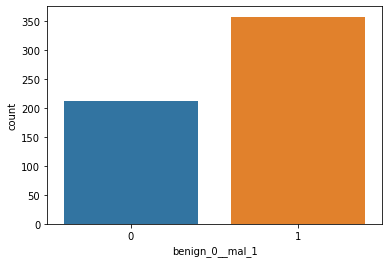

In [7]:
sns.countplot(x='benign_0__mal_1', data=df)

In [10]:
df.corr()['benign_0__mal_1'].sort_values()[:-1]

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

## Train Model

In [11]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [12]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
X_train = scaler.fit_transform(X_train)

In [26]:
X_test = scaler.transform(X_test)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [28]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid')) # 0 or 1

model.compile(loss='binary_crossentropy', optimizer='adam')

In [29]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 1ms/sample - loss: 0.6618 - val_loss: 0.6393
Epoch 2/600
426/426 [==============================] - 0s 91us/sample - loss: 0.6214 - val_loss: 0.6027
Epoch 3/600
426/426 [==============================] - 0s 89us/sample - loss: 0.5828 - val_loss: 0.5601
Epoch 4/600
426/426 [==============================] - 0s 91us/sample - loss: 0.5365 - val_loss: 0.5083
Epoch 5/600
426/426 [==============================] - 0s 87us/sample - loss: 0.4829 - val_loss: 0.4530
Epoch 6/600
426/426 [==============================] - 0s 84us/sample - loss: 0.4299 - val_loss: 0.3996
Epoch 7/600
426/426 [==============================] - 0s 89us/sample - loss: 0.3818 - val_loss: 0.3519
Epoch 8/600
426/426 [==============================] - 0s 89us/sample - loss: 0.3437 - val_loss: 0.3130
Epoch 9/600
426/426 [==============================] - 0s 84us/sample - loss: 0.3064 - val_loss: 0.2798
Epoch 10/600
426/42

426/426 [==============================] - 0s 94us/sample - loss: 0.0505 - val_loss: 0.1180
Epoch 79/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0512 - val_loss: 0.1151
Epoch 80/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0502 - val_loss: 0.1180
Epoch 81/600
426/426 [==============================] - 0s 84us/sample - loss: 0.0501 - val_loss: 0.1144
Epoch 82/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0536 - val_loss: 0.1223
Epoch 83/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0494 - val_loss: 0.1132
Epoch 84/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0487 - val_loss: 0.1219
Epoch 85/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0509 - val_loss: 0.1158
Epoch 86/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0515 - val_loss: 0.1157
Epoch 87/600
426/426 [==============================] - 0s 101us/sam

426/426 [==============================] - 0s 101us/sample - loss: 0.0371 - val_loss: 0.1437
Epoch 156/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0396 - val_loss: 0.1355
Epoch 157/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0418 - val_loss: 0.1358
Epoch 158/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0380 - val_loss: 0.1355
Epoch 159/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0374 - val_loss: 0.1333
Epoch 160/600
426/426 [==============================] - 0s 91us/sample - loss: 0.0367 - val_loss: 0.1421
Epoch 161/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0365 - val_loss: 0.1415
Epoch 162/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0408 - val_loss: 0.1516
Epoch 163/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0410 - val_loss: 0.1297
Epoch 164/600
426/426 [==============================] -

426/426 [==============================] - 0s 84us/sample - loss: 0.0300 - val_loss: 0.1489
Epoch 233/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0314 - val_loss: 0.1431
Epoch 234/600
426/426 [==============================] - 0s 91us/sample - loss: 0.0398 - val_loss: 0.1540
Epoch 235/600
426/426 [==============================] - 0s 199us/sample - loss: 0.0387 - val_loss: 0.1379
Epoch 236/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0401 - val_loss: 0.1724
Epoch 237/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0327 - val_loss: 0.1416
Epoch 238/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0307 - val_loss: 0.1443
Epoch 239/600
426/426 [==============================] - 0s 206us/sample - loss: 0.0291 - val_loss: 0.1548
Epoch 240/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0303 - val_loss: 0.1496
Epoch 241/600
426/426 [==============================]

Epoch 309/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0250 - val_loss: 0.1539
Epoch 310/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0242 - val_loss: 0.1606
Epoch 311/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0250 - val_loss: 0.1552
Epoch 312/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0370 - val_loss: 0.1587
Epoch 313/600
426/426 [==============================] - 0s 91us/sample - loss: 0.0254 - val_loss: 0.1640
Epoch 314/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0241 - val_loss: 0.1554
Epoch 315/600
426/426 [==============================] - 0s 84us/sample - loss: 0.0241 - val_loss: 0.1637
Epoch 316/600
426/426 [==============================] - 0s 91us/sample - loss: 0.0239 - val_loss: 0.1543
Epoch 317/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0245 - val_loss: 0.1557
Epoch 318/600
426/426 [======================

Epoch 386/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0190 - val_loss: 0.1873
Epoch 387/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0200 - val_loss: 0.1669
Epoch 388/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0210 - val_loss: 0.1775
Epoch 389/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0210 - val_loss: 0.1763
Epoch 390/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0211 - val_loss: 0.2009
Epoch 391/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0243 - val_loss: 0.1705
Epoch 392/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0233 - val_loss: 0.2106
Epoch 393/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0197 - val_loss: 0.1707
Epoch 394/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0221 - val_loss: 0.1865
Epoch 395/600
426/426 [=======================

Epoch 463/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0157 - val_loss: 0.2221
Epoch 464/600
426/426 [==============================] - 0s 91us/sample - loss: 0.0152 - val_loss: 0.1910
Epoch 465/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0249 - val_loss: 0.2642
Epoch 466/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0186 - val_loss: 0.1913
Epoch 467/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0161 - val_loss: 0.2234
Epoch 468/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0161 - val_loss: 0.1871
Epoch 469/600
426/426 [==============================] - 0s 91us/sample - loss: 0.0188 - val_loss: 0.2166
Epoch 470/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0151 - val_loss: 0.1907
Epoch 471/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0155 - val_loss: 0.2043
Epoch 472/600
426/426 [======================

426/426 [==============================] - 0s 77us/sample - loss: 0.0151 - val_loss: 0.2270
Epoch 541/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0127 - val_loss: 0.2197
Epoch 542/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0118 - val_loss: 0.2395
Epoch 543/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0110 - val_loss: 0.2223
Epoch 544/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0157 - val_loss: 0.2587
Epoch 545/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0148 - val_loss: 0.2216
Epoch 546/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0094 - val_loss: 0.2859
Epoch 547/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0145 - val_loss: 0.2232
Epoch 548/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0118 - val_loss: 0.2658
Epoch 549/600
426/426 [==============================] - 0s

In [30]:
loss = pd.DataFrame(model.history.history)

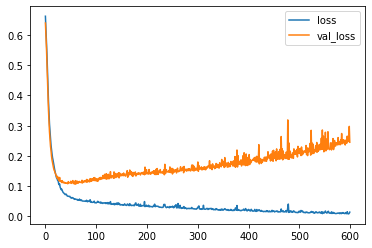

In [31]:
loss.plot() #overfitted the data

### Early Stopping Callback

lets try again but using callbacks to stop before we overfit

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='sigmoid')) # 0 or 1

model.compile(loss='binary_crossentropy', optimizer='adam')

In [34]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25) #minimize validation loss

In [35]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6718 - val_loss: 0.6480
Epoch 2/600
426/426 [==============================] - 0s 118us/sample - loss: 0.6311 - val_loss: 0.6011
Epoch 3/600
426/426 [==============================] - 0s 113us/sample - loss: 0.5803 - val_loss: 0.5494
Epoch 4/600
426/426 [==============================] - 0s 115us/sample - loss: 0.5299 - val_loss: 0.4980
Epoch 5/600
426/426 [==============================] - 0s 112us/sample - loss: 0.4803 - val_loss: 0.4472
Epoch 6/600
426/426 [==============================] - 0s 114us/sample - loss: 0.4317 - val_loss: 0.3975
Epoch 7/600
426/426 [==============================] - 0s 111us/sample - loss: 0.3864 - val_loss: 0.3527
Epoch 8/600
426/426 [==============================] - 0s 117us/sample - loss: 0.3438 - val_loss: 0.3148
Epoch 9/600
426/426 [==============================] - 0s 120us/sample - loss: 0.3086 - val_loss: 0.2812
Epoch 10/60

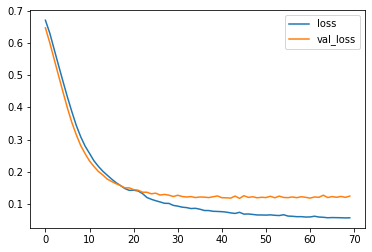

In [36]:
loss = pd.DataFrame(model.history.history) #much better
loss.plot()

### Dropout layers

use dropout layers to try and minimise overfitting

In [38]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid')) # 0 or 1

model.compile(loss='binary_crossentropy', optimizer='adam')

In [39]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6904 - val_loss: 0.6773
Epoch 2/600
426/426 [==============================] - 0s 89us/sample - loss: 0.6919 - val_loss: 0.6514
Epoch 3/600
426/426 [==============================] - 0s 91us/sample - loss: 0.6673 - val_loss: 0.6259
Epoch 4/600
426/426 [==============================] - 0s 145us/sample - loss: 0.6349 - val_loss: 0.6024
Epoch 5/600
426/426 [==============================] - 0s 145us/sample - loss: 0.6198 - val_loss: 0.5780
Epoch 6/600
426/426 [==============================] - 0s 110us/sample - loss: 0.6127 - val_loss: 0.5532
Epoch 7/600
426/426 [==============================] - 0s 91us/sample - loss: 0.5694 - val_loss: 0.5298
Epoch 8/600
426/426 [==============================] - 0s 101us/sample - loss: 0.5464 - val_loss: 0.5025
Epoch 9/600
426/426 [==============================] - 0s 124us/sample - loss: 0.5194 - val_loss: 0.4739
Epoch 10/600
4

426/426 [==============================] - 0s 105us/sample - loss: 0.1213 - val_loss: 0.0960
Epoch 79/600
426/426 [==============================] - 0s 91us/sample - loss: 0.1391 - val_loss: 0.0989
Epoch 80/600
426/426 [==============================] - 0s 91us/sample - loss: 0.1082 - val_loss: 0.1100
Epoch 81/600
426/426 [==============================] - 0s 82us/sample - loss: 0.1288 - val_loss: 0.0929
Epoch 82/600
426/426 [==============================] - 0s 87us/sample - loss: 0.1255 - val_loss: 0.1016
Epoch 83/600
426/426 [==============================] - 0s 82us/sample - loss: 0.1271 - val_loss: 0.1013
Epoch 84/600
426/426 [==============================] - 0s 84us/sample - loss: 0.1307 - val_loss: 0.0912
Epoch 85/600
426/426 [==============================] - 0s 89us/sample - loss: 0.1251 - val_loss: 0.1018
Epoch 86/600
426/426 [==============================] - 0s 89us/sample - loss: 0.1208 - val_loss: 0.0926
Epoch 87/600
426/426 [==============================] - 0s 101us/sa

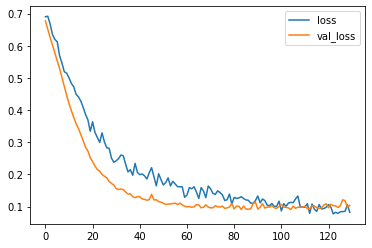

In [40]:
loss = pd.DataFrame(model.history.history) #much better
loss.plot()

## Evaluate Model

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
pred = model.predict_classes(X_test)

In [43]:
print(confusion_matrix(y_test, pred))

[[54  1]
 [ 3 85]]


In [44]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

